

Data Wrangling (Data cleaning Data acquisition , Data pre-processing )

Exploratory Data Analysis

Feature Engineering



## Problem statement

The dataset describes used automobiles in 4 ways:

The technical specification of the automobile

The selling price of am automobile based on technical specifications

The loss per vehicle per year given as “normalized-losses”

The insurance risk rating of the automobile given as “symboling”


“symboling”, corresponds to a car’s insurance risk level. Cars are initially assigned a risk factor symbol that corresponds to their price. If an automobile is more dangerous, this symbol is adjusted by increasing it. A value of +3 indicates that the vehicle is risky, while -3 indicates that it is likely safe to insure.

The second attribute, “normalized-losses,” is the relative average loss payment per insured vehicle year. This figure is normalised for all vehicles within a given size category (two-door, small, station wagons, sports/specialty, etc…) and represents the average loss per vehicle per year.

All the other attributes are self-explanatory and define the price and technical specifications of the vehicles like the size, weight, horsepower, engine-type etc. From the dataset, we can see that many of the attributes can be used for prediction.

In this case, we will try and predict the <b>Price</b> of an automobile.


Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.


2. Read the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Automobile_data.csv')
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Use pandas.read_csv() function to read the csv file. In the bracket, put the file path along so that pandas will read the file into a data frame from that address. The file path can be either an URL or local file address.
Because the data does not include headers, add an argument headers = None inside the read_csv() method, so that pandas will not automatically set the first row as a header.

In [ ]:
df.shape

(205, 26)

5. Check if type casting is needed for any attribute

In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Missing value treatment

In [ ]:
df['normalized-losses'].loc[df['normalized-losses']=='?'].count()

41

In [ ]:
df.replace("?",np.nan, inplace=True)

In [ ]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
df[df['price']=='NaN']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [ ]:
df_num=df.select_dtypes(include=np.number)
df_cat= df.select_dtypes(include=np.object)

In [ ]:
df_num.skew()

symboling            0.211072
wheel-base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb-weight          0.681398
engine-size          1.947655
compression-ratio    2.610862
city-mpg             0.663704
highway-mpg          0.539997
dtype: float64

In [ ]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

#### Mean, Median Imputing

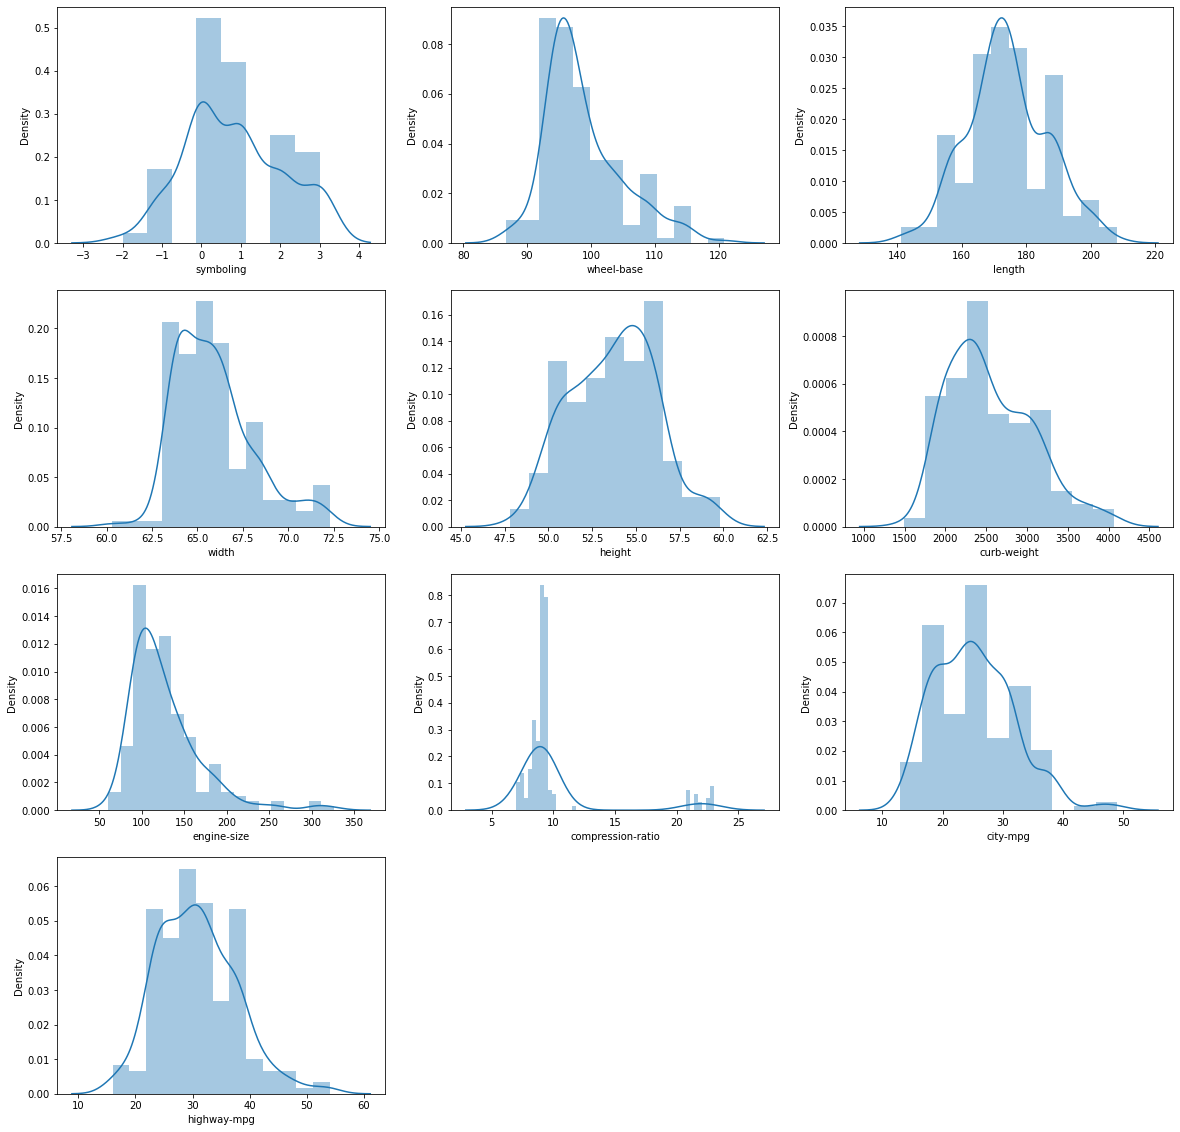

In [ ]:
plt.figure(figsize=(20,20))
i=1
for col in df_num:
    ax=plt.subplot(4,3,i)
    sns.distplot(df[col])
    i+=1


### mean , median imputation

In [ ]:
df['normalized-losses'].fillna(df['normalized-losses'].median(),inplace=True)

In [ ]:
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)

In [ ]:
df['peak-rpm'].fillna(df['peak-rpm'].median(),inplace=True)

In [ ]:
df['bore']=df['bore'].astype('float64')
df['bore'].fillna(df['bore'].mean(),inplace=True)

In [ ]:
df['stroke'].skew()

-0.6831221940577341

In [ ]:
df['stroke'].fillna(df['stroke'].median(),inplace=True)

In [ ]:
df.dropna(subset=['price'], inplace=True)

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### mode imputation

In [ ]:
df['num-of-doors'].mode()[0]

'four'

In [ ]:
df['num-of-doors'].replace(np.nan,df['num-of-doors'].mode()[0], inplace=True)

Simple Imputer

In [ ]:
from sklearn.preprocessing import SimpleImputer

#### Type casting

In [ ]:
df['normalized-losses']=df['normalized-losses'].astype('float64')
df['horsepower']=df['horsepower'].astype('float64')
df['peak-rpm']=df['peak-rpm'].astype('float64')
df['bore']=df['bore'].astype('float64')
df['stroke']=df['stroke'].astype('float64')
df['price']=df['price'].astype('float64')


In [ ]:
df['symboling']=df['symboling'].astype('object')

In [ ]:
df.to_csv('df_pre.csv',index=None)

4. Check how many numeric and how many are categorical variables

In [ ]:
df_num=df.select_dtypes(include=np.number)
df_cat= df.select_dtypes(include=np.object)

In [ ]:
df_num.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
df_cat.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


6. Find out the target attribute

In [ ]:
Y=df_num.drop('price', axis=1)

7. Summary statistics (Categorical, Numeric both)

In [ ]:
df.describe(include=np.number)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,120.711443,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.257562,10.164279,103.313433,5118.407960,25.179104,30.686567,13207.129353
std,32.111623,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316082,4.004965,37.374942,478.183493,6.423220,6.815150,7947.066342
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,137.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.describe(include=np.object)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201,201
unique,6,22,2,2,2,5,3,2,6,7,8
top,0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,65,32,181,165,115,94,118,198,145,157,92


In [ ]:
df_cat.to_csv('autompg_cat.csv',index=False)

In [ ]:
df_num.to_csv('autompg_num.csv',index=False)